# 预处理

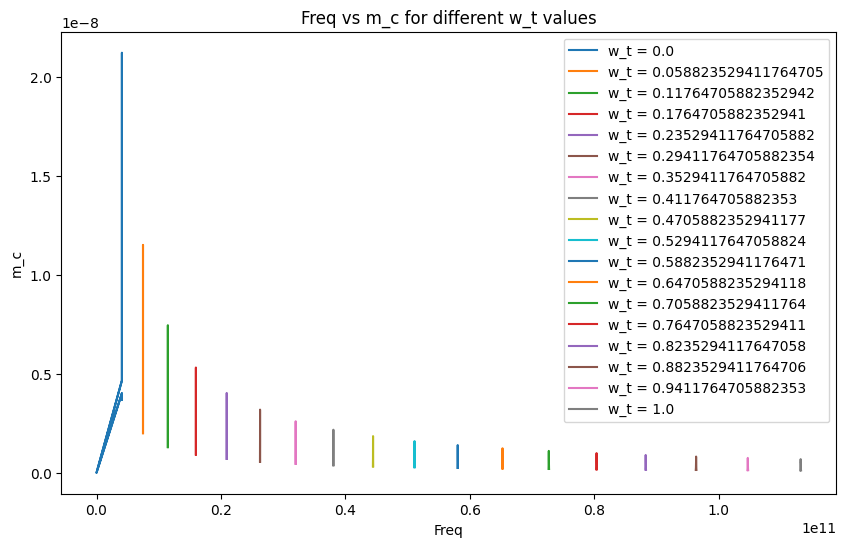

In [2]:
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# HDF5 文件路径
file_path = 'w_l_v_q.h5'

# 使用 pandas 读取 HDF5 文件中的 DataFrame
results_df = pd.read_hdf(file_path, 'mydata')

# 选择需要归一化的列
columns_to_normalize = ['w_t', 'l_t', 'Q', 'V']

# 初始化 MinMaxScaler 并对指定列进行归一化
scaler = MinMaxScaler()
results_df[columns_to_normalize] = scaler.fit_transform(results_df[columns_to_normalize])

# 获取所有不同的 w_t 值
unique_w_t = results_df['w_t'].unique()

# 设置画布大小
plt.figure(figsize=(10, 6))

# 遍历每个不同的 w_t 值
for w_t_value in unique_w_t:
    # 筛选出对应 w_t 的行
    subset = results_df[results_df['w_t'] == w_t_value]
    
    # 提取 freq 和 m_c 数据
    freq = subset['freq'].iloc[0]  
    m_c = subset['m_c'].iloc[0]
    
    # 绘制每组数据
    plt.plot(freq, m_c, label=f"w_t = {w_t_value}")

# 添加标题和标签
plt.title("Freq vs m_c for different w_t values")
plt.xlabel("Freq")
plt.ylabel("m_c")

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [3]:
# 获取第一个样本的 freq 和 m_c
record_index = 0  # 你可以更改为其他记录的索引，例如 1 或 10

# 选择一条记录的 freq 和 m_c
freq_array = results_df['freq'].size
m_c_array = results_df['m_c'].size

# 打印 freq 和 m_c
print(f"Record {record_index}:")
print("freq array:", freq_array)
print("m_c array:", m_c_array)



Record 0:
freq array: 46656
m_c array: 46656


# 归一化（freq，m_z）

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 读取 HDF5 文件中的 DataFrame
file_path = 'w_l_v_q.h5'
results_df = pd.read_hdf(file_path, 'mydata')

# 获取所有频谱数据和目标数据
n_samples = len(results_df)  # 样本数量

# 构建 X：每条记录的 freq 和 m_c 是长度为 180 的数组
X = np.zeros((n_samples, 180, 2))  # 初始化 X，形状为 (n_samples, 180, 2)

# 填充 X 数组
for i in range(n_samples):
    X[i, :, 0] = results_df.iloc[i]['freq']  # 取每条记录的 freq 列
    X[i, :, 1] = results_df.iloc[i]['m_c']  # 取每条记录的 m_c 列

# 归一化输出数据 (w_t, l_t, Q, V)
columns_to_normalize = ['w_t', 'l_t', 'Q', 'V']
output_scaler = MinMaxScaler()
y = results_df[columns_to_normalize].values
y_scaled = output_scaler.fit_transform(y)  # 对输出进行归一化

# 打印归一化后的数据
print("First normalized output (y):", y_scaled[-1])

# 打印输入数据的形状
print("Shape of input X:", X.shape)  # (n_samples, 180, 2)
print("Shape of output y:", y_scaled.shape)  # (n_samples, 4)


First normalized output (y): [1. 1. 1. 1.]
Shape of input X: (46656, 180, 2)
Shape of output y: (46656, 4)


In [5]:
from sklearn.preprocessing import MinMaxScaler

# 假设 X 形状为 (n_samples, 180, 2)，即频谱数据（freq, m_c）
# 首先将 X 展平为 (n_samples * 180, 2) 以便进行归一化
X_reshaped = X.reshape(-1, 2)

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 对数据进行归一化处理
X_scaled = scaler.fit_transform(X_reshaped)

# 重新将 X 转换为原来的形状 (n_samples, 180, 2)
X_scaled = X_scaled.reshape(X.shape)

# 检查归一化后的数据
print("Min value in X_scaled:", X_scaled.min())
print("Max value in X_scaled:", X_scaled.max())


Min value in X_scaled: 0.0
Max value in X_scaled: 1.0


In [12]:
import torch
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")



Is CUDA available: True
CUDA device count: 1
Current device: 0
Device name: NVIDIA GeForce RTX 4060 Laptop GPU


C:\Users\Yingbo\AppData\Local\Temp\ipykernel_33148\1175573968.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_scaled = torch.tensor(X_scaled, dtype=torch.float32)  # 输入数据
C:\Users\Yingbo\AppData\Local\Temp\ipykernel_33148\1175573968.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_scaled = torch.tensor(y_scaled, dtype=torch.float32)  # 输出目标


Epoch [1/50], Train Loss: 0.0665, Val Loss: 0.0709
Epoch [2/50], Train Loss: 0.0526, Val Loss: 0.0579
Epoch [3/50], Train Loss: 0.0505, Val Loss: 0.0510
Epoch [4/50], Train Loss: 0.0493, Val Loss: 0.0477
Epoch [5/50], Train Loss: 0.0489, Val Loss: 0.0503
Epoch [6/50], Train Loss: 0.0484, Val Loss: 0.0477
Epoch [7/50], Train Loss: 0.0481, Val Loss: 0.0477
Epoch [8/50], Train Loss: 0.0480, Val Loss: 0.0470
Epoch [9/50], Train Loss: 0.0479, Val Loss: 0.0471
Epoch [10/50], Train Loss: 0.0477, Val Loss: 0.0465
Epoch [11/50], Train Loss: 0.0477, Val Loss: 0.0471
Epoch [12/50], Train Loss: 0.0475, Val Loss: 0.0467
Epoch [13/50], Train Loss: 0.0474, Val Loss: 0.0465
Epoch [14/50], Train Loss: 0.0475, Val Loss: 0.0465
Epoch [15/50], Train Loss: 0.0473, Val Loss: 0.0460
Epoch [16/50], Train Loss: 0.0473, Val Loss: 0.0463
Epoch [17/50], Train Loss: 0.0472, Val Loss: 0.0460
Epoch [18/50], Train Loss: 0.0472, Val Loss: 0.0462
Epoch [19/50], Train Loss: 0.0471, Val Loss: 0.0464
Epoch [20/50], Train 

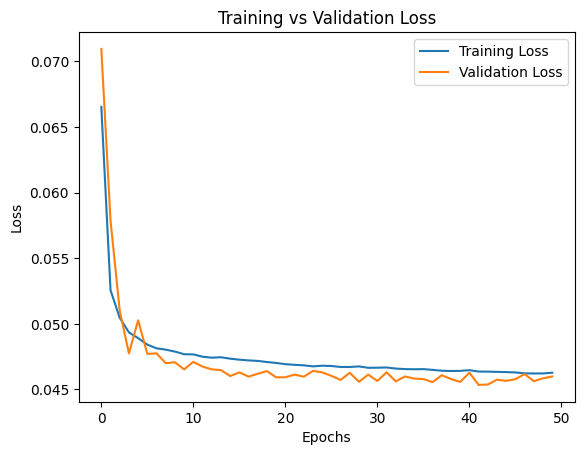

Validation Loss: 0.0460


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

# 假设 X_scaled 是归一化后的频谱数据，y_scaled 是标准化后的目标值
# X_scaled: (n_samples, 180, 2)
# y_scaled: (n_samples, 4)

# 1. 准备数据
# 转换数据为 PyTorch 张量
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)  # 输入数据
y_scaled = torch.tensor(y_scaled, dtype=torch.float32)  # 输出目标

# 拆分数据集为训练集和验证集
dataset = TensorDataset(X_scaled, y_scaled)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 创建 DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 2. 定义 CNN 模型
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=2, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.2)
        
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3)
        
        self.flatten = nn.Flatten()
        # 全连接层将在 forward 中动态初始化
        self.fc1 = None
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = self.pool(x)
        x = self.dropout(x)
        
        x = nn.ReLU()(self.conv2(x))
        x = self.pool(x)
        x = self.dropout(x)
        
        x = nn.ReLU()(self.conv3(x))
        x = self.pool(x)
        x = self.dropout(x)
        
        # 动态初始化全连接层的输入大小
        if self.fc1 is None:
            flattened_size = x.size(1) * x.size(2)  # 动态计算 Flatten 后的大小
            self.fc1 = nn.Linear(flattened_size, 128).to(x.device)
        
        x = self.flatten(x)
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 初始化模型并移动到 GPU（如果可用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)

# 3. 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 训练模型
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        # 转换输入维度 (batch_size, 2, 180) 并移动到 GPU
        X_batch = X_batch.permute(0, 2, 1).to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # 验证阶段
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.permute(0, 2, 1).to(device)
            y_batch = y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# 5. 可视化训练过程

import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6. 评估模型性能
model.eval()
val_loss = 0.0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.permute(0, 2, 1).to(device)
        y_batch = y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        val_loss += loss.item()
val_loss /= len(val_loader)
print(f"Validation Loss: {val_loss:.4f}")


In [15]:
torch.save(model, "my_model_pytorch.pth")
print("Complete model saved to my_model_pytorch.pth")


Complete model saved to my_model_pytorch.pth


In [22]:
import torch
import numpy as np
from torch.serialization import add_safe_globals

# 加载完整的模型
# 添加 `CNNModel` 到安全全局类中
add_safe_globals([CNNModel])

# 加载完整的模型
model = torch.load("my_model_pytorch.pth",weights_only=False)


# 将模型移动到设备（GPU 或 CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 切换到评估模式
model.eval()

# 转换验证集数据为张量并移动到设备
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 2, 1).to(device)

# 使用模型进行预测
with torch.no_grad():
    predictions = model(X_val_tensor).cpu().numpy()  # 转换为 NumPy 数组

# 将预测值和真实值反归一化
predictions_original = output_scaler.inverse_transform(predictions)
y_val_original = output_scaler.inverse_transform(y_val)

# 打印前 5 个样本的预测结果和真实值
for i in range(5):
    print(f"Sample {i+1}:")
    print("Predicted values (original scale): ", predictions_original[i])
    print("True values (original scale):      ", y_val_original[i])
    print("-" * 30)


Sample 1:
Predicted values (original scale):  [7.4885768e-04 7.2398984e-06 3.5896676e+04 7.8531895e+00]
True values (original scale):       [8.0e-04 6.0e-06 4.5e+04 8.0e+00]
------------------------------
Sample 2:
Predicted values (original scale):  [4.1022978e-04 1.4278315e-05 2.1102656e+04 4.5016432e+00]
True values (original scale):       [4.50e-04 1.80e-05 2.75e+04 3.00e+00]
------------------------------
Sample 3:
Predicted values (original scale):  [5.7548506e-04 1.4064283e-05 2.4431574e+04 1.4994674e+00]
True values (original scale):       [3.e-04 8.e-06 5.e+03 2.e+00]
------------------------------
Sample 4:
Predicted values (original scale):  [6.4871658e-04 1.0626473e-05 3.7799031e+04 8.0782995e+00]
True values (original scale):       [5.0e-04 8.0e-06 4.5e+04 8.0e+00]
------------------------------
Sample 5:
Predicted values (original scale):  [4.8038739e-04 1.4384564e-05 2.5908398e+04 6.2589440e+00]
True values (original scale):       [4.5e-04 1.4e-05 1.0e+04 9.0e+00]
------

# CNN 

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# 假设 X_scaled 是归一化后的频谱数据，y_scaled 是标准化后的目标值

# 1. 准备数据
# 假设 X_scaled 形状为 (n_samples, 180, 2) - 频谱数据（
# 假设 y_scaled 形状为 (n_samples, 4) - 包含 ['w_t', 'l_t', 'Q', 'V']

# 拆分数据集为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 2. 定义 CNN 模型
model = models.Sequential()

# 第一层：卷积层
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(180, 2)))  # 输入形状为 (180, 2) = 180个采样点，2个特征 (freq, m_c)
model.add(layers.MaxPooling1D(2))  # 池化层
model.add(layers.Dropout(0.2))  # Dropout 防止过拟合

# 第二层：卷积层
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))  # 池化层
model.add(layers.Dropout(0.2))  # Dropout 防止过拟合

# 第三层：卷积层
model.add(layers.Conv1D(256, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))  # 池化层
model.add(layers.Dropout(0.2))  # Dropout 防止过拟合

# 将三维输出展平为一维
model.add(layers.Flatten())

# 全连接层
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout 防止过拟合

# 输出层，4个输出节点对应 ['w_t', 'l_t', 'Q', 'V']
model.add(layers.Dense(4))

# 3. 编译模型
model.compile(optimizer='adam', loss='mse')  # 使用均方误差 (MSE) 作为损失函数

# 4. 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# 5. 评估模型性能
# 评估模型在验证集上的表现
val_loss = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")

# 6. 可视化训练过程
import matplotlib.pyplot as plt

# 绘制训练和验证的损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50


c:\Users\Yingbo\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 536/1167 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0786

KeyboardInterrupt: 

# 保存Model

In [3]:
# 保存整个模型到 HDF5 文件
model.save('my_model.h5')
print("Model saved to my_model.h5")


NameError: name 'model' is not defined

# 反归一化预测

In [28]:

##mode  = .load("my_model.h5")


model = tf.keras.models.load_model("my_model.h5",compile= False)
# 使用模型对验证集数据进行预测
predictions = model.predict(X_val)

# 使用反归一化将预测值恢复到原始尺度
predictions_original = output_scaler.inverse_transform(predictions)
y_val_original = output_scaler.inverse_transform(y_val)

# 打印前 5 个反归一化后的预测结果和真实值
for i in range(5):
    print(f"Sample {i+1}:")
    print("Predicted values (original scale): ", predictions_original[i])
    print("True values (original scale):      ", y_val_original[i])
    print("-" * 30)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sample 1:
Predicted values (original scale):  [7.4731855e-04 6.5662880e-06 3.7899891e+04 8.1386967e+00]
True values (original scale):       [8.0e-04 6.0e-06 4.5e+04 8.0e+00]
------------------------------
Sample 2:
Predicted values (original scale):  [3.9109238e-04 1.4912889e-05 1.5996865e+04 4.7299123e+00]
True values (original scale):       [4.50e-04 1.80e-05 2.75e+04 3.00e+00]
------------------------------
Sample 3:
Predicted values (original scale):  [6.2572287e-04 1.4317406e-05 2.7840088e+04 1.4313693e+00]
True values (original scale):       [3.e-04 8.e-06 5.e+03 2.e+00]
------------------------------
Sample 4:
Predicted values (original scale):  [6.2989921e-04 9.8780138e-06 4.0312883e+04 8.4679136e+00]
True values (original scale):       [5.0e-04 8.0e-06 4.5e+04 8.0e+00]
------------------------------
Sample 5:
Predicted values (original scale):  [4.7894113e-04 1.4652599e-05 2.4085988e+04 6.6010413e+00]
True values (original scale):      

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
误差分析：
w_t: MAE=0.1577, RMSE=0.1968
l_t: MAE=0.1998, RMSE=0.2462
Q: MAE=0.2363, RMSE=0.2785
V: MAE=0.1513, RMSE=0.1894
选择的坏预测阈值：0.2
w_t: 坏预测占比 = 33.43%
l_t: 坏预测占比 = 44.32%
Q: 坏预测占比 = 55.63%
V: 坏预测占比 = 26.50%
坏预测样本比例：83.68%


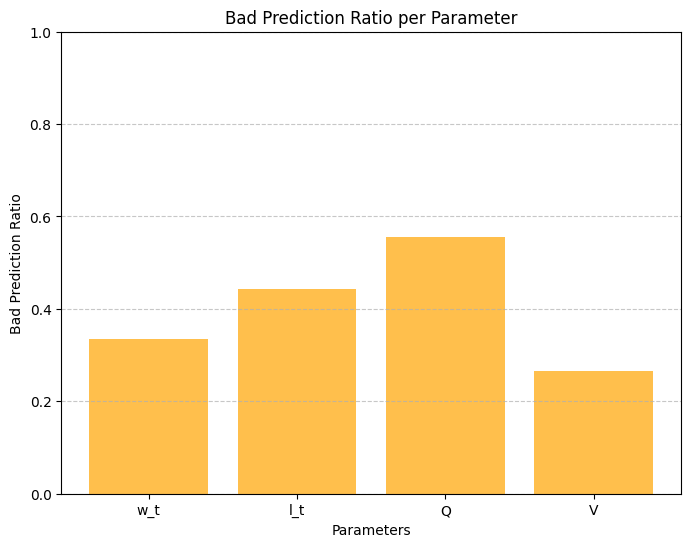

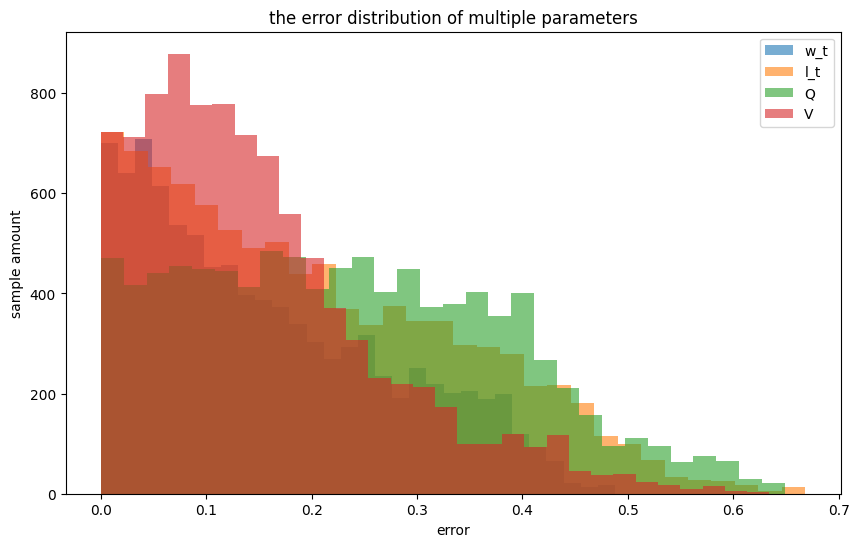

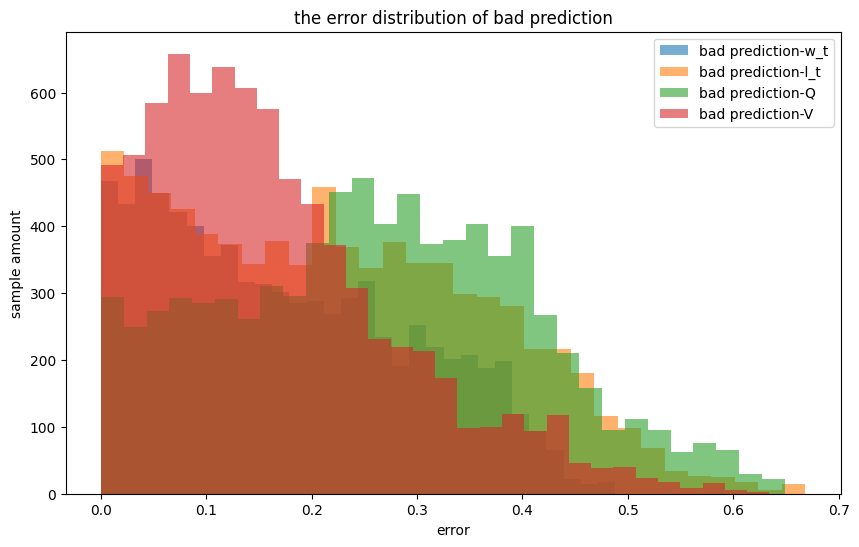

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. 加载模型
from tensorflow.keras.models import load_model



# 2. 使用模型进行预测
y_pred = model.predict(X_val)  # X_val 是验证集输入
y_true = y_val  # y_val 是验证集真实标签

# 3. 针对每个目标参数计算误差
# 目标参数名称
parameter_names = ['w_t', 'l_t', 'Q', 'V']

# 计算每个参数的 MAE 和 RMSE
mae_per_param = np.mean(np.abs(y_pred - y_true), axis=0)  # 平均绝对误差
rmse_per_param = np.sqrt(np.mean((y_pred - y_true) ** 2, axis=0))  # 均方根误差

# 输出结果
print("误差分析：")
for i, param in enumerate(parameter_names):
    print(f"{param}: MAE={mae_per_param[i]:.4f}, RMSE={rmse_per_param[i]:.4f}")

# 4. 找出坏预测样本
# 定义坏预测的阈值
threshold = 0.2
errors = np.abs(y_pred - y_true)  # 每个样本每个参数的绝对误差
print(f"选择的坏预测阈值：{threshold}")
bad_predictions = np.any(errors > threshold, axis=1)  # 至少一个参数误差超出阈值
bad_indices = np.where(bad_predictions)[0]


bad_prediction_ratios = []
for i, param in enumerate(parameter_names):
    bad_param_indices = errors[:, i] > threshold  # 当前参数误差超过阈值的样本
    bad_ratio = np.sum(bad_param_indices) / len(y_true)  # 计算坏预测占比
    bad_prediction_ratios.append(bad_ratio)
    print(f"{param}: 坏预测占比 = {bad_ratio:.2%}")

# 输出坏预测样本比例
print(f"坏预测样本比例：{len(bad_indices) / len(y_true):.2%}")

# 5. 可视化分析

# (1) 每个参数的误差分布

# 可视化每个参数的坏预测占比
plt.figure(figsize=(8, 6))
plt.bar(parameter_names, bad_prediction_ratios, color='orange', alpha=0.7)
plt.title('Bad Prediction Ratio per Parameter')
plt.ylabel('Bad Prediction Ratio')
plt.xlabel('Parameters')
plt.ylim(0, 1)  # 坏预测占比在0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
for i, param in enumerate(parameter_names):
    plt.hist(errors[:, i], bins=30, alpha=0.6, label=param)
plt.title('the error distribution of multiple parameters')
plt.xlabel('error')
plt.ylabel('sample amount')
plt.legend()
plt.show()

# (2) 坏预测样本的参数分布
plt.figure(figsize=(10, 6))
for i, param in enumerate(parameter_names):
    plt.hist(errors[bad_indices, i], bins=30, alpha=0.6, label=f"bad prediction-{param}")
plt.title('the error distribution of bad prediction')
plt.xlabel('error')
plt.ylabel('sample amount')
plt.legend()
plt.show()


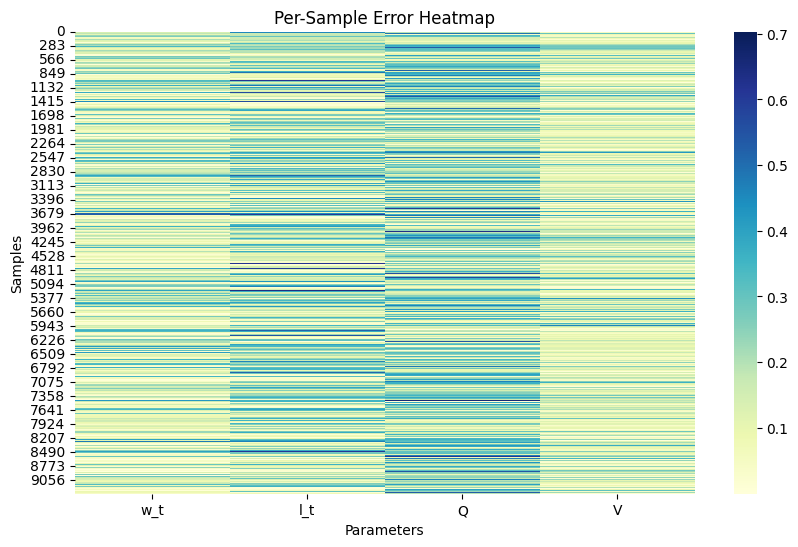

In [ ]:
#Error Heatmap

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(errors, annot=False, cmap="YlGnBu")
plt.title("Per-Sample Error Heatmap")
plt.xlabel("Parameters")
plt.ylabel("Samples")
plt.xticks(ticks=np.arange(len(parameter_names)) + 0.5, labels=parameter_names)
plt.show()

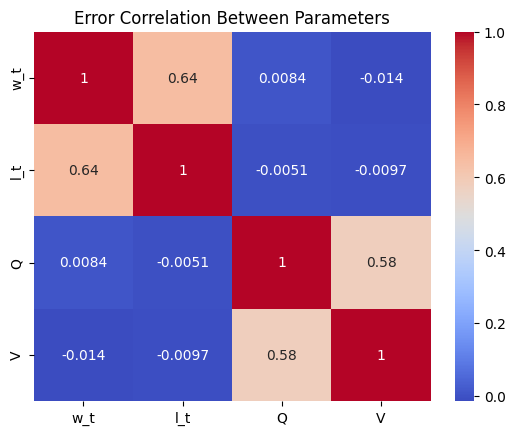

In [ ]:
#Parameter Correlation with Errors

import pandas as pd

# Example correlation plot
df_errors = pd.DataFrame(errors, columns=parameter_names)
correlation = df_errors.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Error Correlation Between Parameters")
plt.show()
